# Predicting The Cost of Diamonds

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pickle
import gzip

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Data Collection

In [2]:
df = pd.read_csv("data/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### DATA DETAILS
**price** in US dollars (\$326--\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth total** depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)

# 2. Data Cleaning

In [3]:
df.shape

(53940, 11)

In [4]:
# drop Unnamed column
df.drop(["Unnamed: 0"], axis = 1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**OBSERVATION**:
    x, y and z have 0 as a minimum value.

In [7]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
# Renaming x, y, z and depth column
df.rename(columns={"x":"length", "y":"width", "z":"depth", "depth":"depth total"}, inplace=True)
df.head()

,carat,cut,color,clarity,depth total,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.dtypes

carat          float64
cut             object
color           object
clarity         object
depth total    float64
table          float64
price            int64
length         float64
width          float64
depth          float64
dtype: object

In [10]:
df.replace(0, np.nan, inplace=True)

In [11]:
df.isna().sum()

carat           0
cut             0
color           0
clarity         0
depth total     0
table           0
price           0
length          8
width           7
depth          20
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

carat          0
cut            0
color          0
clarity        0
depth total    0
table          0
price          0
length         0
width          0
depth          0
dtype: int64

In [14]:
df.shape

(53920, 10)

# 3. Exploratory Data Analysis

In [15]:
# pip install matplotlib==3.1.2

## 3.1. Categorical Features

### 3.1.1. Cut

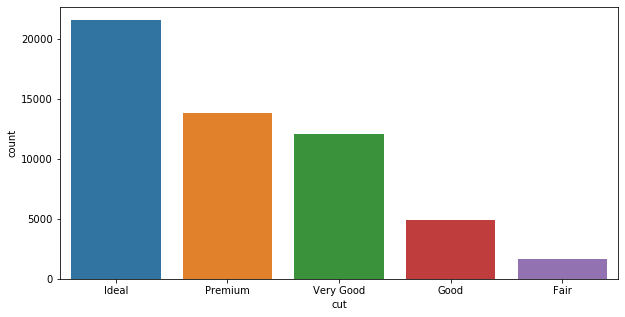

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(df.cut, order=df.cut.value_counts().keys(), ax=ax);

**OBSERVATION**:
Majority of the diamond cuts in the dataset are Ideal cuts.

- ### Cut vs Price

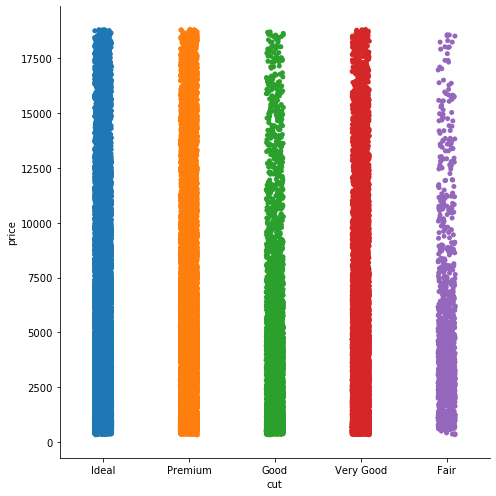

In [17]:
sns.catplot(x='cut', y='price', data = df, height=7, aspect=1);

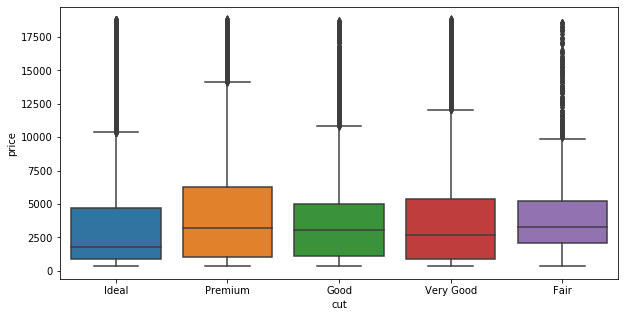

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cut', y='price', data=df);

**OBSERVATION**:
- There is a possibility of a diamond costing $17500 regardless of the cut.

### 3.1.2. Color

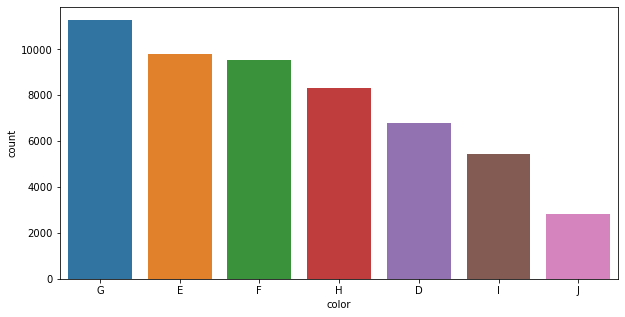

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.color, order=df.color.value_counts().keys(), ax = ax);

**OBSERVATION**:
    Majority of the diamonds in the dataset are color **G**. 

- ### Color vs Price

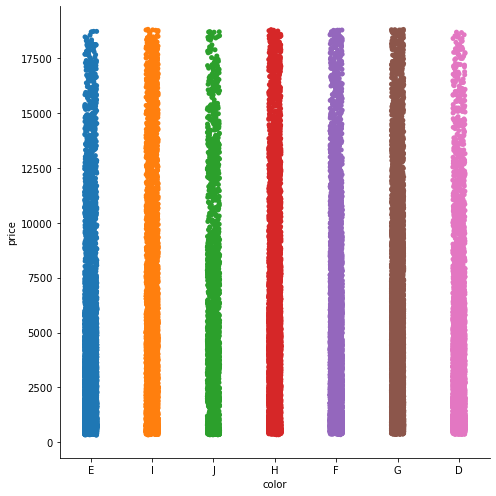

In [20]:
sns.catplot(x='color', y='price', data=df, height=7, aspect=1);

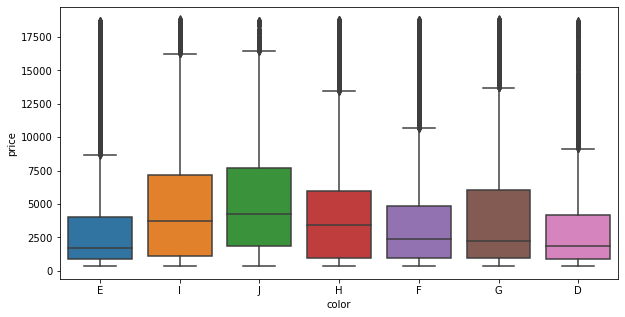

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='color', y='price', data=df);

**OBSERVATION**:
    There is a possibility of a diamond costing $17500 regardless of the color.

### 3.1.3. Clarity

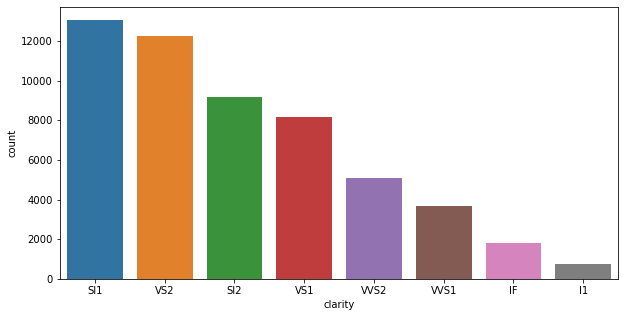

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.clarity, order = df.clarity.value_counts().keys(), ax = ax);

**OBSERVATION**:
    Majority of the clarity in the dataset is SI1.

- ### Clarity vs Price

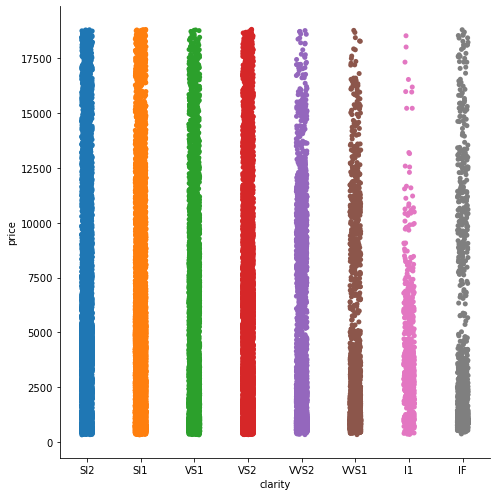

In [23]:
sns.catplot(x='clarity', y='price', data=df, height=7, aspect=1);

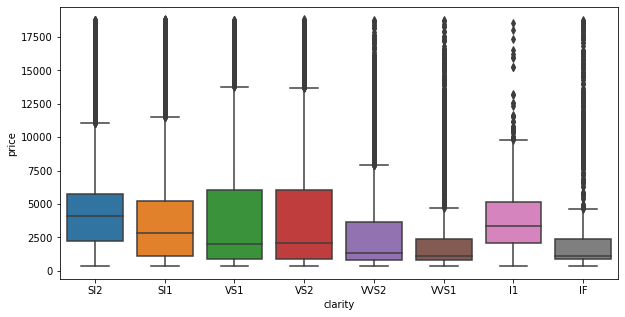

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x='clarity', y='price', data=df);

**OBSERVATION**:
    There is a possibility of a diamond costing $17500 regardless of the clarity.

## 3.2. Numerical Features

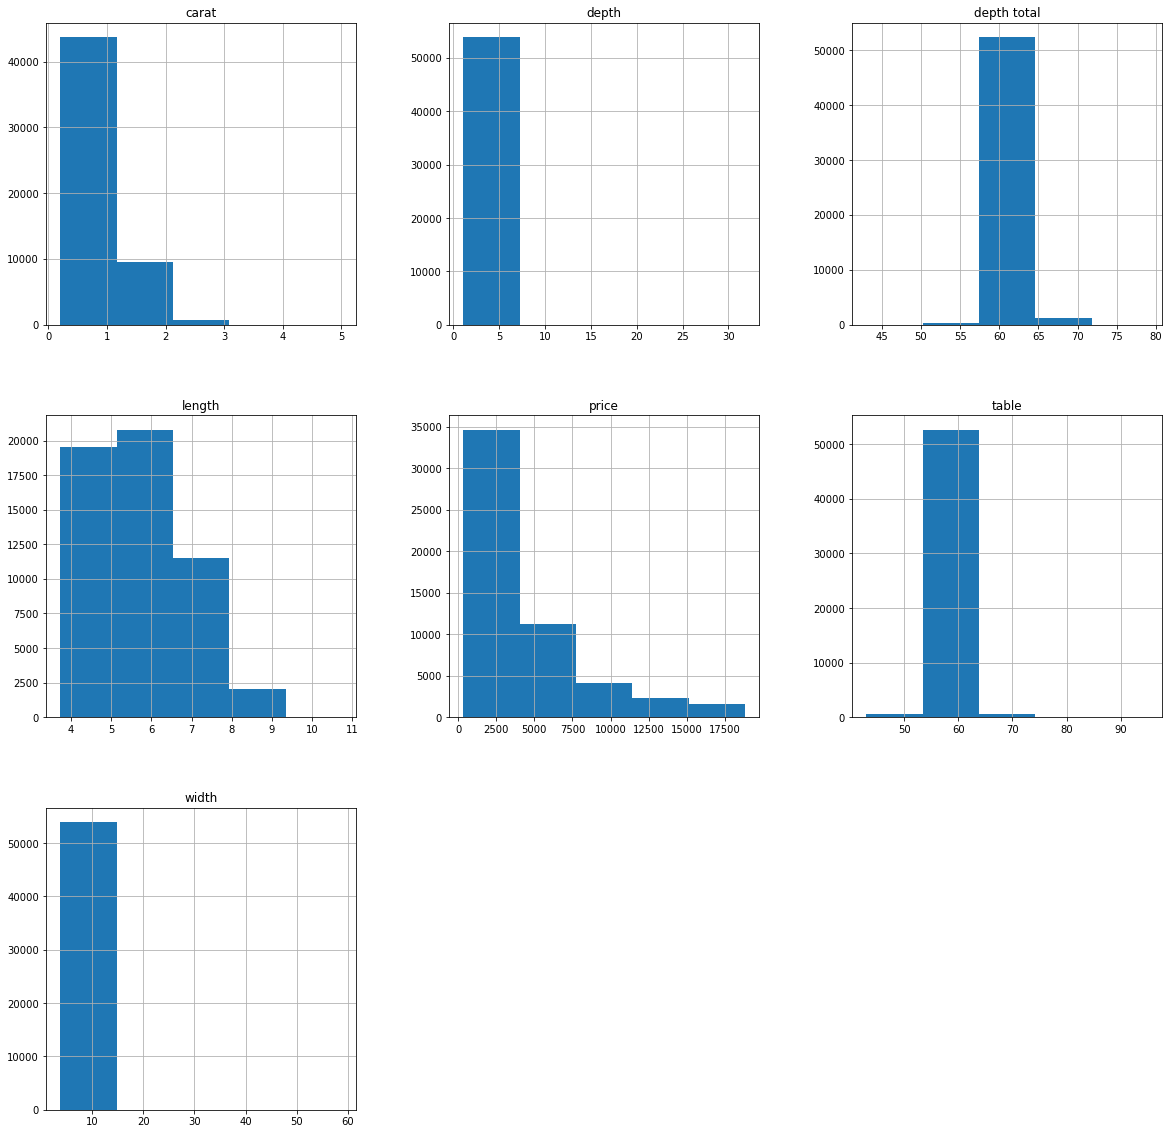

In [25]:
df.hist(figsize=(20,20), bins=5);

- ### PRICE

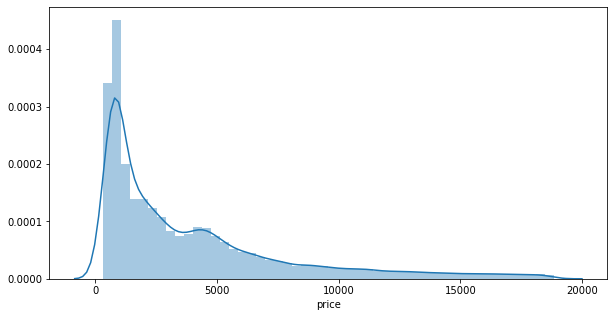

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(df["price"])
plt.show()

**OBSERVATION**:
   - **price** data is skewed to the right, therefore
   - The mean is greater than the median
   - The mode is less than the median

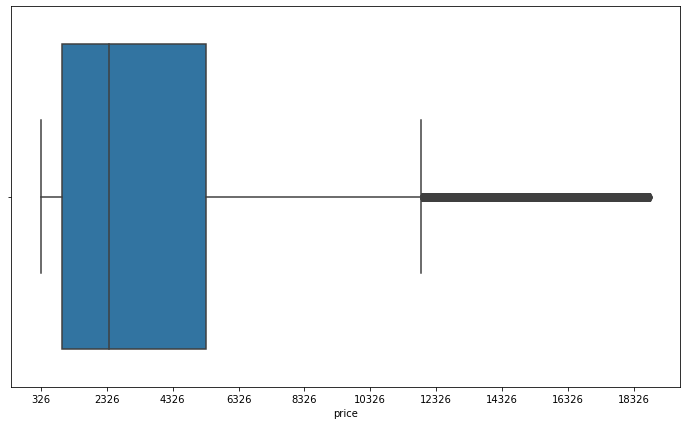

In [27]:
plt.figure(figsize=(12,7))

sns.boxplot(df['price'])
plt.xticks(np.arange(df['price'].min(), df['price'].max(), step=2000))

plt.show()

**OBSERVATION**:
- Positive Skew.
- Minimum value is 326.
- The Median is approximately 2328.
- The Maximun value is greater than 18326.

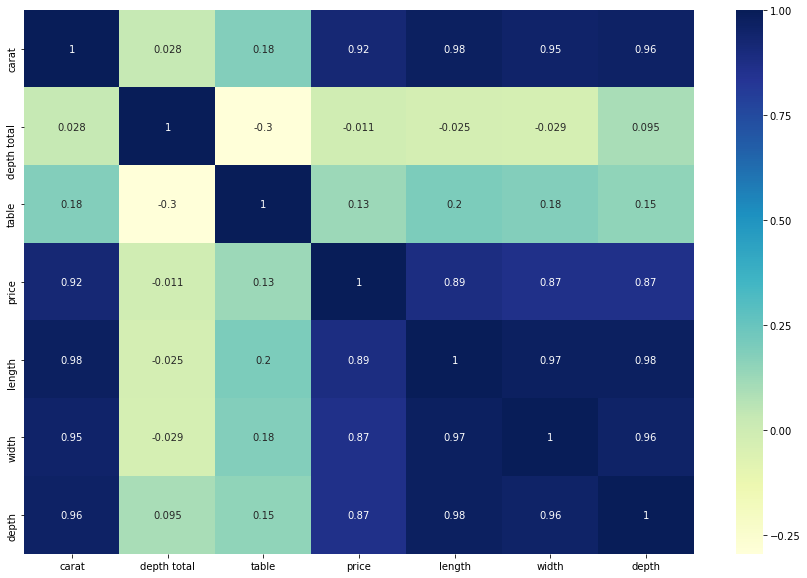

In [28]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

**OBSERVATION**:
- **depth**, **width**, **length** and **carat** have a strong relation with price.
- **depth total** and **table** don't have a strong relation with price.
- **depth total** and **table** don't have a strong relation with the other columns.

In [29]:
# Convert Categorical Features to Numeric
le = LabelEncoder()

# Apply le on categorical feature columns
df[['cut', 'color', 'clarity']] = df[['cut', 'color', 'clarity']].apply(lambda col: le.fit_transform(col))

# 4. Building Model

Predict the **price** of diamonds using the following features:
- **carat**
- **cut**
- **color**
- **clarity**
- **length**
- **width**
- **depth**

In [30]:
df_model = df[['carat', 'cut', 'color', 'clarity', 'length', 'width', 'depth', 'price']]
df_model.head()

,carat,cut,color,clarity,length,width,depth,price
0,0.23,2,1,3,3.95,3.98,2.43,326
1,0.21,3,1,2,3.89,3.84,2.31,326
2,0.23,1,1,4,4.05,4.07,2.31,327
3,0.29,3,5,5,4.20,4.23,2.63,334
4,0.31,1,6,3,4.34,4.35,2.75,335


In [31]:
df_model.tail()

,carat,cut,color,clarity,length,width,depth,price
53935,0.72,2,0,2,5.75,5.76,3.50,2757
53936,0.72,1,0,2,5.69,5.75,3.61,2757
53937,0.70,4,0,2,5.66,5.68,3.56,2757
53938,0.86,3,4,3,6.15,6.12,3.74,2757
53939,0.75,2,0,3,5.83,5.87,3.64,2757


In [32]:
X = df_model.drop("price", axis=1)
y = df_model["price"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2)

In [33]:
# Feature Scaling
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test);

In [34]:
R2_Score = []
Mean_Absolute_Error = []
Mean_Squared_Error = []

models = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest Regressor', 
          'Gradient Boosting Regressor', 'SVR', 'KNeighborsRegressor']

## 4.1. LinearRegression

In [35]:
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

y_pred = reg_lr.predict(X_test)

In [36]:
score = reg_lr.score(X_test, y_test)
print('Score : %.2f' % score )

Score : 0.88


In [37]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 : %.2f' % r2)
print('MAE : %.2f' % mae)
print('MSE : %.2F' % mse)

R2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

R2 : 0.88
MAE : 866.08
MSE : 1820269.59


## 4.2. Ridge

In [38]:
reg_ridge = Ridge()
reg_ridge.fit(X_train, y_train)

y_pred = reg_ridge.predict(X_test)

In [39]:
score = reg_ridge.score(X_test, y_test)
print('Score : %.2f' % score)

Score : 0.88


In [40]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 : %.2f' % r2)
print('MAE : %.2f' % mae)
print('MSE : %.2f' % mse)

R2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

R2 : 0.88
MAE : 866.47
MSE : 1820458.65


## 4.3. Lasso

In [41]:
reg_lasso = Lasso()
reg_lasso.fit(X_train, y_train)

y_pred = reg_lasso.predict(X_test)

In [42]:
score = reg_lasso.score(X_test, y_test)
print('Score : %.2f' % score)

Score : 0.88


In [43]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 : %.2f' % r2)
print('MAE : %.2f' % mae)
print('MSE : %.2f' % mse)

R2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

R2 : 0.88
MAE : 868.40
MSE : 1822333.95


## 4.4. RandomForestRegressor

In [44]:
reg_rf = RandomForestRegressor(n_estimators=100)
reg_rf.fit(X_train, y_train)

y_pred = reg_rf.predict(X_test)

In [45]:
score = reg_rf.score(X_test, y_test)
print('Score : %.2f' % score)

Score : 0.98


In [46]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 : %.2f' % r2)
print('MAE : %.2f' % mae)
print('MSE : %.2f' % mse)

R2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

R2 : 0.98
MAE : 277.22
MSE : 311304.51


## 4.5. GadientBoostingRegressor

In [47]:
reg_gbr = GradientBoostingRegressor()
reg_gbr.fit(X_train, y_train)

y_pred = reg_gbr.predict(X_test)

In [48]:
score = reg_gbr.score(X_test, y_test)
print('Score : %.2f' % score)

Score : 0.97


In [49]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 : %.2f' % r2)
print('MAE : %.2f' % mae)
print('MSE : %.2f' % mse)

R2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

R2 : 0.97
MAE : 373.63
MSE : 455754.07


## 4.6. SVR

In [50]:
reg_svr = SVR(gamma='auto')
reg_svr.fit(X_train, y_train)

y_pred = reg_svr.predict(X_test)

In [51]:
score = reg_svr.score(X_test, y_test)
print('Score : %.2f' % score)

Score : 0.45


In [52]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 : %.2f' % r2)
print('MAE : %.2f' % mae)
print('MSE : %.2f' % mse)

R2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

R2 : 0.45
MAE : 1442.12
MSE : 8654331.94


## 4.7. KNeighborsRegressor

In [53]:
reg_knr = KNeighborsRegressor()
reg_knr.fit(X_train, y_train)

y_pred = reg_knr.predict(X_test)

In [54]:
score = reg_knr.score(X_test, y_test)
print('Score : %.2f' % score)

Score : 0.98


In [55]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 : %.2f' % r2)
print('MAE : %.2f' % mae)
print('MSE : %.2f' % mse)

R2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

R2 : 0.98
MAE : 311.11
MSE : 373145.57


## COMPARING MODELS

In [56]:
compare_models = pd.DataFrame({'Algorithms' : models, 'R2 Scores' : R2_Score, 
                               'Mean Absolute Error' : Mean_Absolute_Error,
                               'Mean Squared Error' : Mean_Squared_Error})
compare_models.sort_values(by='R2 Scores', ascending=False)

,Algorithms,R2 Scores,Mean Absolute Error,Mean Squared Error
3,Random Forest Regressor,0.980071,277.219840,3.113045e+05
6,KNeighborsRegressor,0.976112,311.109236,3.731456e+05
4,Gradient Boosting Regressor,0.970824,373.628748,4.557541e+05
0,Linear Regression,0.883472,866.081666,1.820270e+06
1,Ridge,0.883460,866.465420,1.820459e+06
2,Lasso,0.883340,868.400688,1.822334e+06
5,SVR,0.445976,1442.124764,8.654332e+06


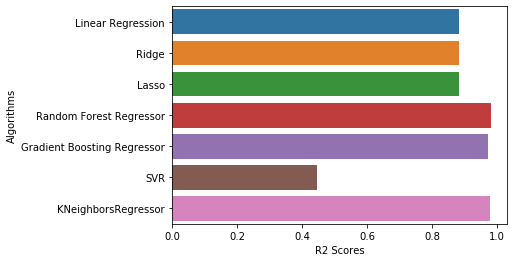

In [57]:
sns.barplot(x='R2 Scores', y='Algorithms', data=compare_models);

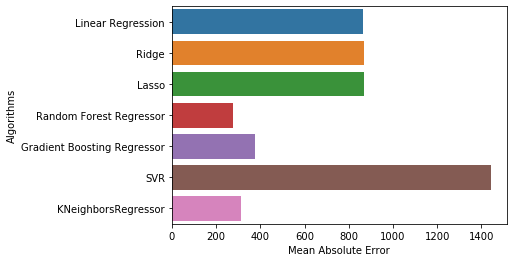

In [58]:
sns.barplot(x='Mean Absolute Error', y='Algorithms', data=compare_models);

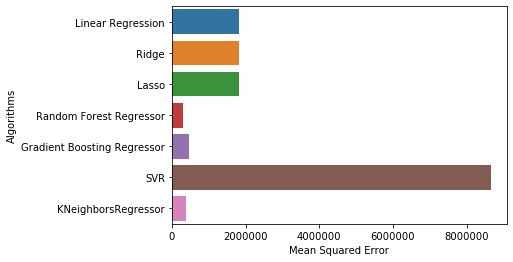

In [59]:
sns.barplot(x='Mean Squared Error', y='Algorithms', data=compare_models);

**OBSERVATION**:
- The best performing model is the **RandomForestRegressor** since it has the highest **r2_score** and 
- lowest **mean_absolute_error** and **mean_squared_error**.

# 5. SAVE MODEL

In [60]:
# Save RandomForestRegressor Model
filename = "Diamond_Prices.pklz"
pickle.dump(reg_rf, gzip.open(filename, 'wb'))

In [61]:
# load model
load_model = pickle.load(gzip.open(filename, 'rb'))
result = load_model.score(X_test, y_test)
print(result)

0.9800712379510985
